# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.125716e+01     8.706895e+00
 * time: 0.001990079879760742
     1     2.925416e+01     4.512813e+00
 * time: 0.008630990982055664
     2     2.018095e+01     4.467184e+00
 * time: 0.015922069549560547
     3     1.387119e+01     3.296558e+00
 * time: 0.022921085357666016
     4     1.056835e+01     1.408721e+00
 * time: 0.030169963836669922
     5     1.045774e+01     2.640991e+00
 * time: 0.03605198860168457
     6     9.840211e+00     1.407019e+00
 * time: 0.0422821044921875
     7     9.166142e+00     1.437192e+00
 * time: 0.04794597625732422
     8     8.620203e+00     1.314513e+00
 * time: 0.05379915237426758
     9     8.359130e+00     1.177083e+00
 * time: 0.059678077697753906
    10     8.205107e+00     9.474517e-01
 * time: 0.06585812568664551
    11     8.103891e+00     7.946374e-01
 * time: 0.10229301452636719
    12     7.993387e+00     6.508010e-01
 * time: 0.10742712020874023
    13     7.907589e+00     5.079810e-01
 * 

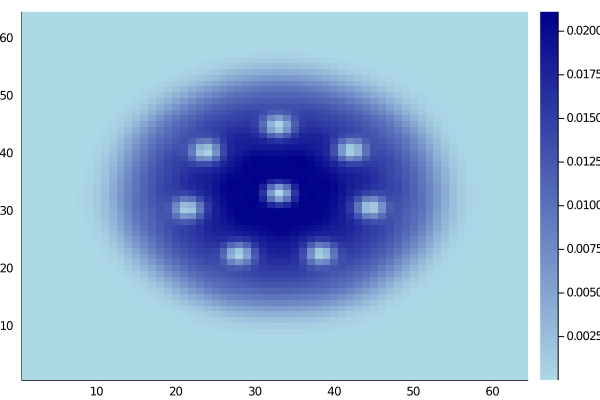

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)